# Data Science Project - Predicting bike rentals
## Project demonstrating predictions of bike rentals using Linear Regression, Decision trees and Random Forest. High Skewness on the distribution of the counts of bike rented affected all three Machine Learning models due to which the MSE turned out to be very high.
### by Vinay Kumar Ranganath Babu

In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

# Load the dataset into Pandas dataframe
bike_rentals = pd.read_csv("bike_rental_hour.csv")
# First 5 rows of the data
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


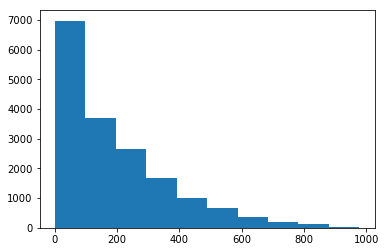

In [3]:
plt.hist(bike_rentals["cnt"])
plt.show()

In [4]:
# Correlation of "cnt" with rest other columns
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

We can observe that count of the bike rentals is strongly correlated with registered (whether a user has already registered or not) and casual. We can also see some correlation with the temperature and the hour bike is rented.

In [5]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

## Error metric

The mean squared error metric makes the most sense to evaluate our error.  MSE works on continuous numeric data, which fits our data quite well.

In [6]:
train = bike_rentals.sample(frac=.8)

In [7]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

# Machine Learning 

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
import numpy
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

16520.386409238912

In [11]:
test["cnt"]

3         13
9         14
13        94
14       106
16        93
20        36
21        34
33        53
37        59
41        53
43        22
47         5
57        61
58        61
71         1
72         2
87       112
90        35
107       89
119        4
126       84
128       70
130       86
135       48
140        1
143       34
144       84
153       87
155      123
156       95
        ... 
17223    114
17229     43
17233     19
17234     30
17235      9
17237      1
17238      2
17241     36
17244     23
17246     10
17252     53
17254     35
17258     10
17276    257
17278    117
17282     26
17295    222
17298    225
17300    271
17301    213
17312      3
17325    110
17330     32
17333     19
17336      2
17338     13
17355     34
17358      1
17370    315
17375     89
Name: cnt, dtype: int64

## Error

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts.  Larger errors are penalized more with MSE, which leads to a higher total error.

## Decision Trees

In [13]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [14]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2834.044340821723

In [15]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2984.2442622426865

## Decision tree error

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2157.9524293041286

## Random forest error

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.